In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ta import add_all_ta_features
import yfinance as yf
# mock data visuallization
import matplotlib.pyplot as plt
import mplfinance as mpf

In [98]:
# for writing to file
from pathlib import Path  

### Get the time data from real stock in the market
to generate mock data

In [99]:
aapl_df = yf.Ticker("AAPL").history(interval= "1d",start="2018-01-01", end="2022-12-31")


In [100]:
def process_input(dataframe):
    if (dataframe.index.name == 'Date'):
        dataframe = dataframe.reset_index()

    dataframe['Date'] = pd.to_datetime(dataframe['Date'].dt.date)
    dataframe = dataframe.set_index('Date')
    return dataframe


In [101]:
date_index = process_input(aapl_df).index
plot_style = "checkers"
fsize = (15, 6)

In [102]:
# generate varience of stock by random number
def varience_multiplier(multiplier, stockdata):
    return np.random.rand(len(stockdata)) * stockdata * multiplier

In [103]:
def last_month_avg_price(prices, day):
  trading_days = 21
  starting_day = max(day - trading_days + 1, 0)
  days = day - starting_day + 1
  sum = 0
  for i in range(starting_day, day + 1):
    sum += prices[i]
  return sum / days

In [104]:
def add_volume(prices, low = 5 * (10 ** 7), high = 5 * (10 ** 8)):
  vol = np.empty(len(prices))
  for i in range(len(prices)):
    price = prices[i]
    last_avg = last_month_avg_price(prices, i)
    dif = (abs(price - last_avg) / last_avg) * 100.0
    if dif < 5:
      vol[i] = np.random.uniform(low, max(low + 1, low * dif))
    elif dif < 10:
      vol[i] = np.random.uniform(low * 2.0, max(low * 2.0 + 1, low * dif / 2.0))
    elif dif < 50:
      vol[i] = np.random.uniform(low * 3.0, high)
    else:
      vol[i] = np.random.uniform(low * 4.0, high)
  return vol

In [105]:
# create open high low Dataframe from close price time series data
def add_mock_details(base_price_series, index):

    y_base = base_price_series
    y_close = y_base + varience_multiplier(0.1, y_base)
    y_open = y_close + varience_multiplier(0.1, y_base)

    compare_close_open = y_close > y_open

    high_modifier = np.absolute(varience_multiplier(0.1, y_base))
    low_modifier = np.absolute(varience_multiplier(0.1, y_base))
    y_high = np.where(compare_close_open, y_close + high_modifier, y_open + high_modifier)
    y_low = np.where(compare_close_open, y_open - low_modifier, y_close - low_modifier)

    volume = add_volume(y_close)

    data = {'Open': y_open, 'High': y_high, 'Low': y_low, 'Close': y_close, 'Volume': volume}

    df = pd.DataFrame(data, index=index)

    return df

In [106]:
# write file
def write_to_csv(df, filename):
    dir = './mock_data/' + filename + ".csv"
    filepath = Path(dir)  
    filepath.parent.mkdir(parents=True, exist_ok=True)

    df.to_csv(filepath) 

### Test generating and loading data

In [109]:
X_train = date_index

y_base = np.arange(50,100,50/len(date_index)) 
print(y_base[0:5])
df = add_mock_details(y_base, date_index)
df.head()
write_to_csv(df, "test")

[50.         50.03971406 50.07942812 50.11914218 50.15885624]


In [110]:
df = pd.read_csv("./mock_data/test.csv", index_col=0)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,56.979909,60.599169,51.178451,54.104331,5.000000e+07
2018-01-03,57.319940,61.617450,48.412989,52.972310,5.028479e+07
2018-01-04,57.089316,61.209451,48.495971,53.435838,5.000000e+07
2018-01-05,56.197104,57.017643,49.921794,53.416497,5.000000e+07
2018-01-08,51.887114,53.340585,50.039091,50.863214,6.701179e+07


# Mock Patterns

## Linear Mock Data

### low varience

In [111]:
X_train = date_index
y_train = np.arange(50,100,50/len(date_index)) 
y_noise = np.random.rand(len(date_index)) * y_train * 0.1
y_train += y_noise
df = add_mock_details(y_train, date_index)
write_to_csv(df, "linear_low_varince")

(<Figure size 1500x600 with 2 Axes>, [<Axes:ylabel='Price'>, <Axes:>])

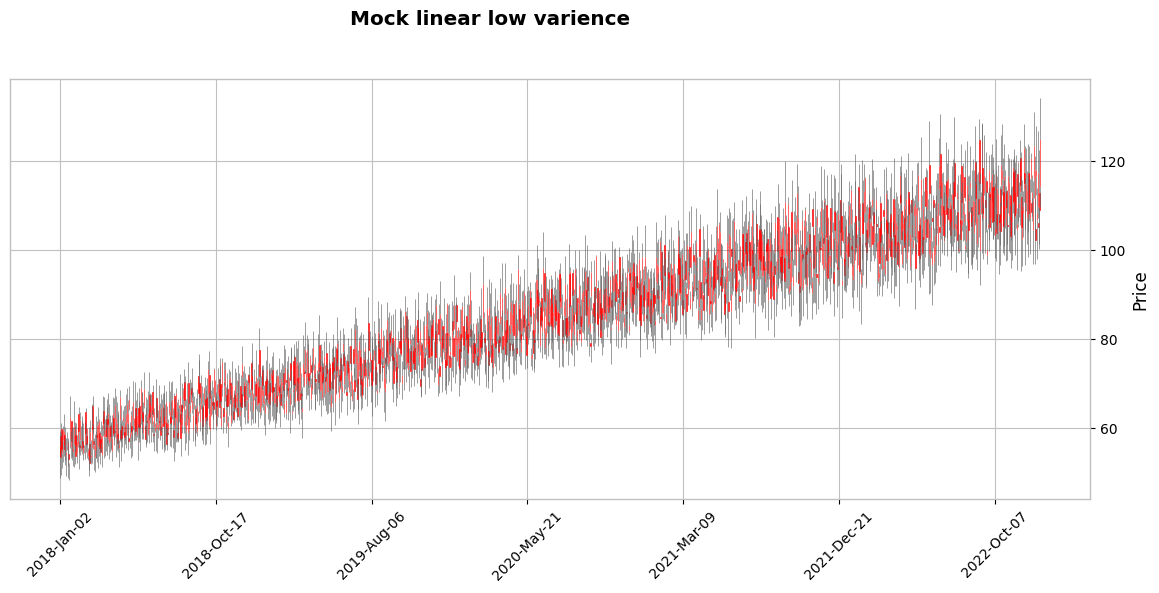

In [112]:
mpf.plot(df,
         type="candle", 
         title = "Mock linear low varience",  
         figsize=fsize,
         style=plot_style, 
         returnfig=True,
         show_nontrading=False,
         warn_too_much_data=1500
    )

### high varience

In [113]:
X_train = date_index
y_train = np.arange(50,100,50/len(date_index)) 
y_noise = np.random.rand(len(date_index)) * y_train * 0.5
y_train += y_noise
df = add_mock_details(y_train, date_index)
write_to_csv(df, "linear_high_varince")

(<Figure size 1500x600 with 2 Axes>, [<Axes:ylabel='Price'>, <Axes:>])

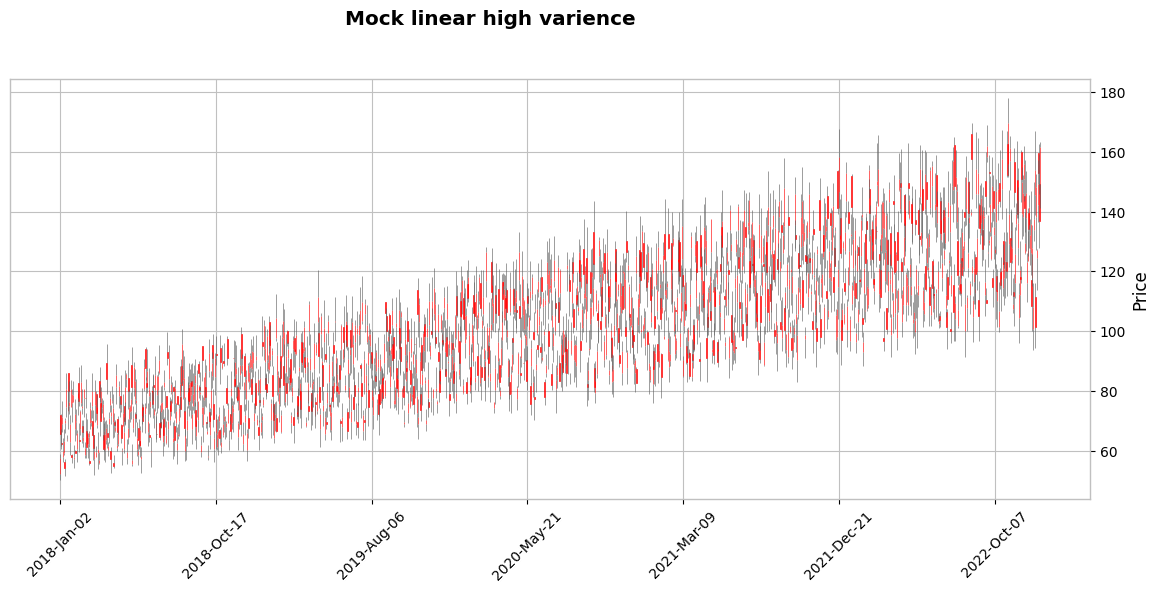

In [114]:
mpf.plot(df,
         type="candle", 
         title = "Mock linear high varience",  
         figsize=fsize,
         style=plot_style, 
         returnfig=True,
         show_nontrading=False,
         warn_too_much_data=1500
    )

## Sin Wave Mock Data

In [115]:
X_train = date_index
y_train = np.sin(np.array(range(len(date_index)))*np.pi/60) * 5 + 6
y_noise = np.random.rand(len(date_index))
y_train += y_noise
df = add_mock_details(y_train, date_index)
write_to_csv(df, "sin_wave")

(<Figure size 1500x600 with 2 Axes>, [<Axes:ylabel='Price'>, <Axes:>])

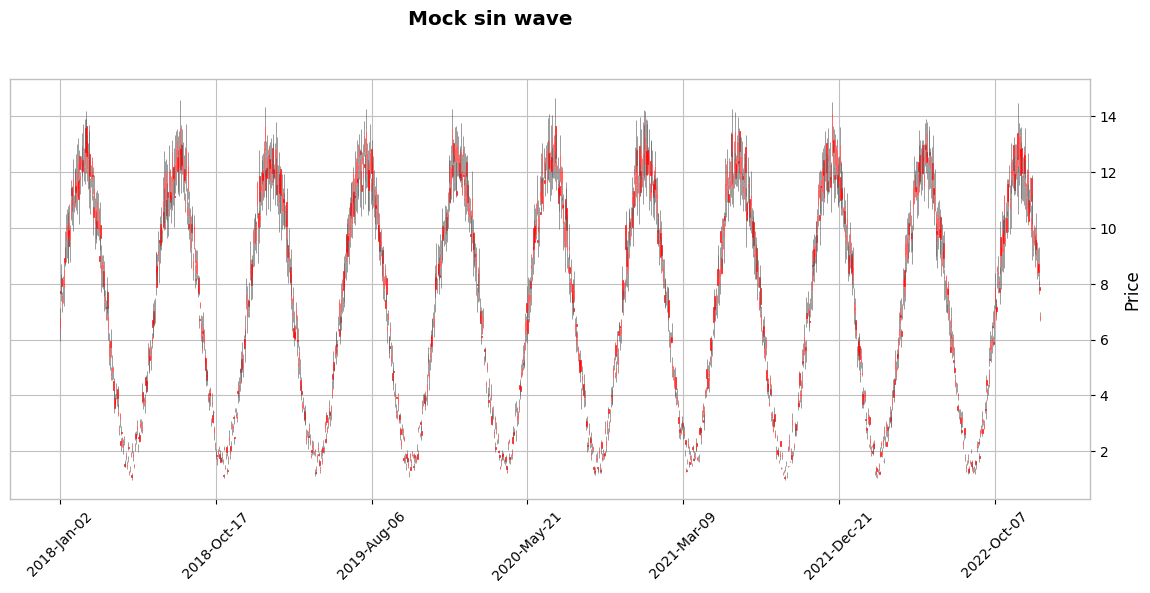

In [116]:
mpf.plot(df,
         type="candle", 
         title = "Mock sin wave",  
         figsize=fsize,
         style=plot_style, 
         returnfig=True,
         show_nontrading=False,
         warn_too_much_data=1500
    )

In [117]:
y2_train = np.sin(np.array(range(len(date_index)))*np.pi/60) * 5 * (-1) + 6
y_noise = np.random.rand(len(date_index))
y2_train += y_noise

df2 = add_mock_details(y2_train, date_index)
write_to_csv(df, "sin_wave_complement")

(<Figure size 1500x600 with 2 Axes>, [<Axes:ylabel='Price'>, <Axes:>])

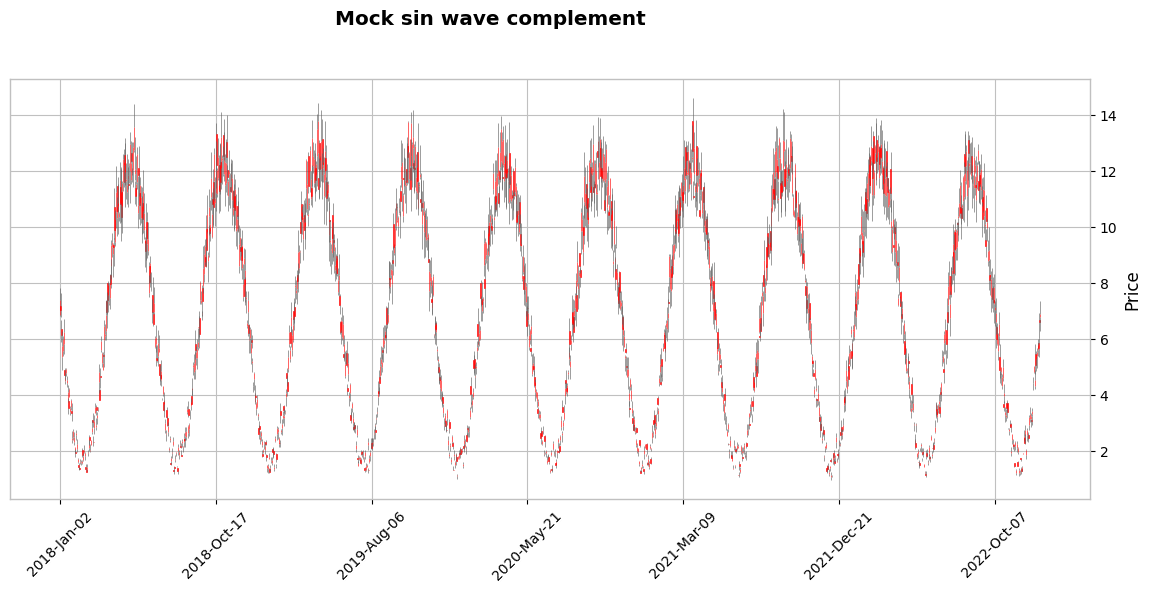

In [118]:
mpf.plot(df2,
         type="candle", 
         title = "Mock sin wave complement",  
         figsize=fsize,
         style=plot_style, 
         returnfig=True,
         show_nontrading=False,
         warn_too_much_data=1500,
    )

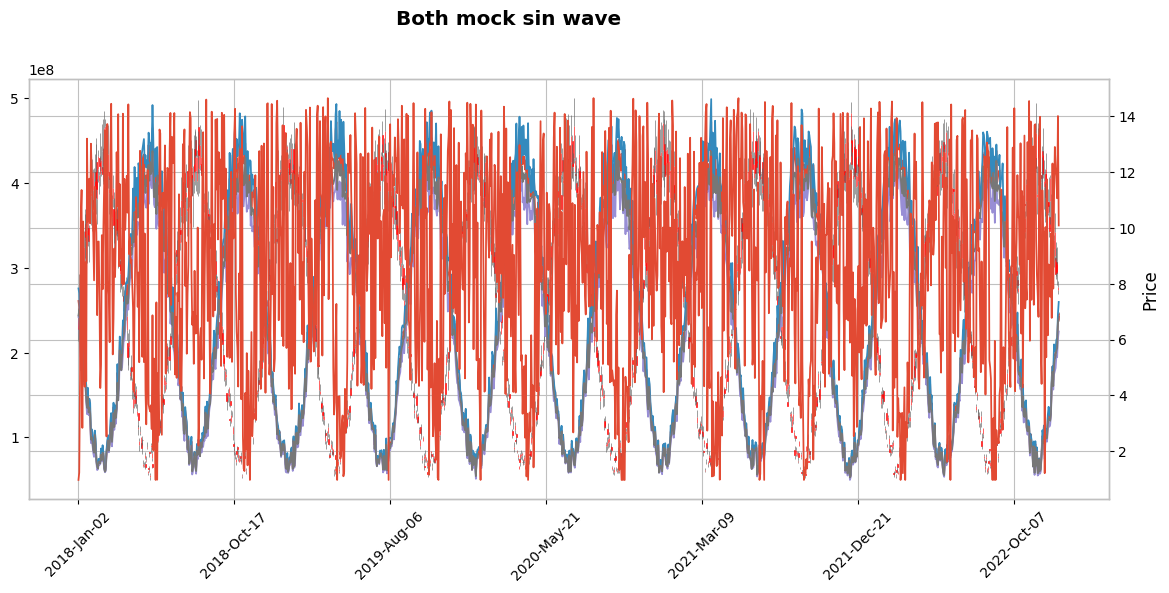

In [119]:
addplot = mpf.make_addplot(df2)

mpf.plot(df,
         type="candle", 
         title = "Both mock sin wave",  
         figsize=fsize,
         style=plot_style, 
         returnfig=True,
         show_nontrading=False,
         warn_too_much_data=1500,
         addplot=addplot
    )

mpf.show()

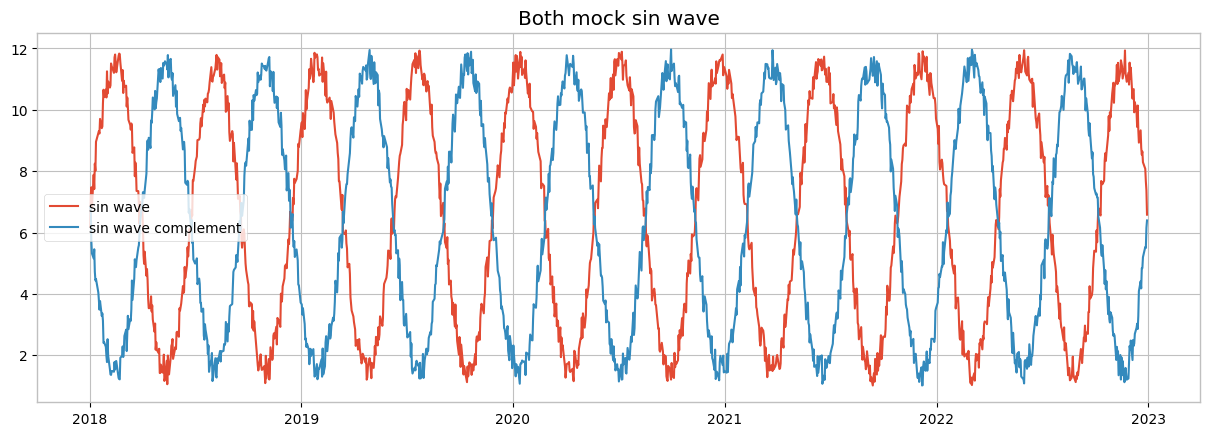

In [120]:
plt.figure().set_figwidth(15)

plt.plot(X_train, y_train, label='sin wave')
plt.plot(X_train, y2_train, label='sin wave complement')

plt.title('Both mock sin wave')
plt.legend()

plt.show()

## Sin Wave Mock Data + shift pi/4

In [121]:
X_train = date_index
y_train = np.sin(np.array(range(len(date_index)))*np.pi/60 + np.pi/4) * 5 + 6
y_noise = np.random.rand(len(date_index))
y_train += y_noise
df = add_mock_details(y_train, date_index)
write_to_csv(df, "sin_wave_shift_pi_d_4")

(<Figure size 1500x600 with 2 Axes>, [<Axes:ylabel='Price'>, <Axes:>])

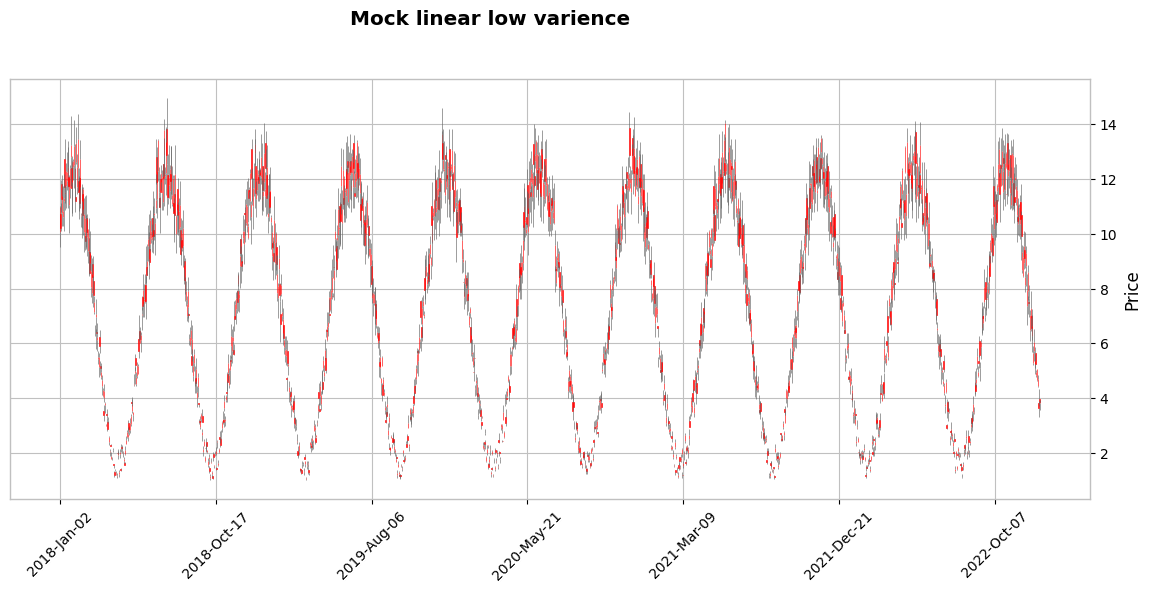

In [122]:
mpf.plot(df,
         type="candle", 
         title = "Mock linear low varience",  
         figsize=fsize,
         style=plot_style, 
         returnfig=True,
         show_nontrading=False,
         warn_too_much_data=1500
    )

In [123]:
y2_train = np.sin(np.array(range(len(date_index)))*np.pi/60 + np.pi/4) * 5 * (-1) + 6
y_noise = np.random.rand(len(date_index))
y2_train += y_noise

df2 = add_mock_details(y2_train, date_index)
write_to_csv(df, "sin_wave_shift_pi_d_4_complement")

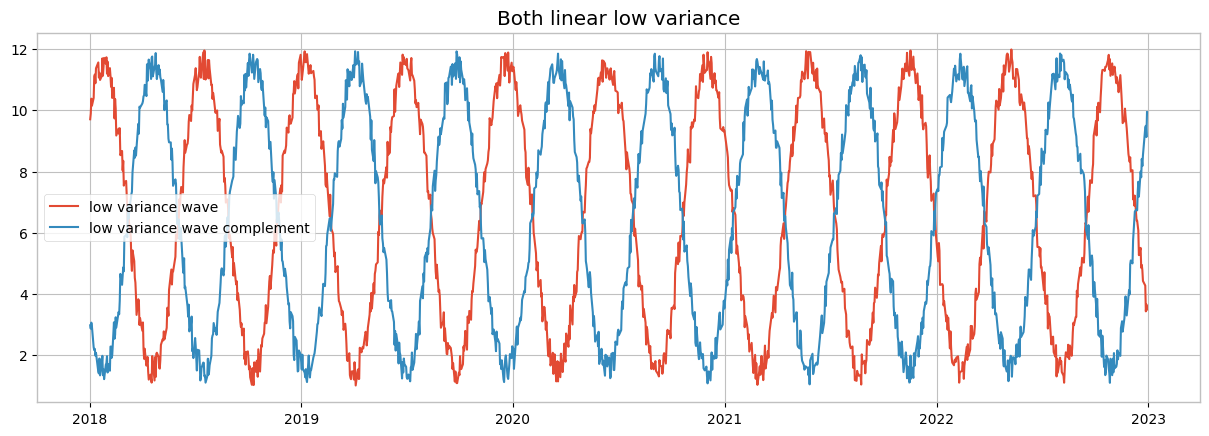

In [124]:
plt.figure().set_figwidth(15)

plt.plot(X_train, y_train, label='low variance wave')
plt.plot(X_train, y2_train, label='low variance wave complement')

plt.title('Both linear low variance')
plt.legend()

plt.show()

## Sin Wave Going up

In [125]:
X_train = date_index
y_linear = np.arange(50,100,50/len(date_index)) 
y_sin = np.sin(np.array(range(len(date_index)))*np.pi/60) * 5 + 6
y_noise = np.random.rand(len(date_index))
y_train = y_linear + y_sin + y_noise
df = add_mock_details(y_train, date_index)
write_to_csv(df, "sin_wave_going_up")

(<Figure size 1500x600 with 2 Axes>, [<Axes:ylabel='Price'>, <Axes:>])

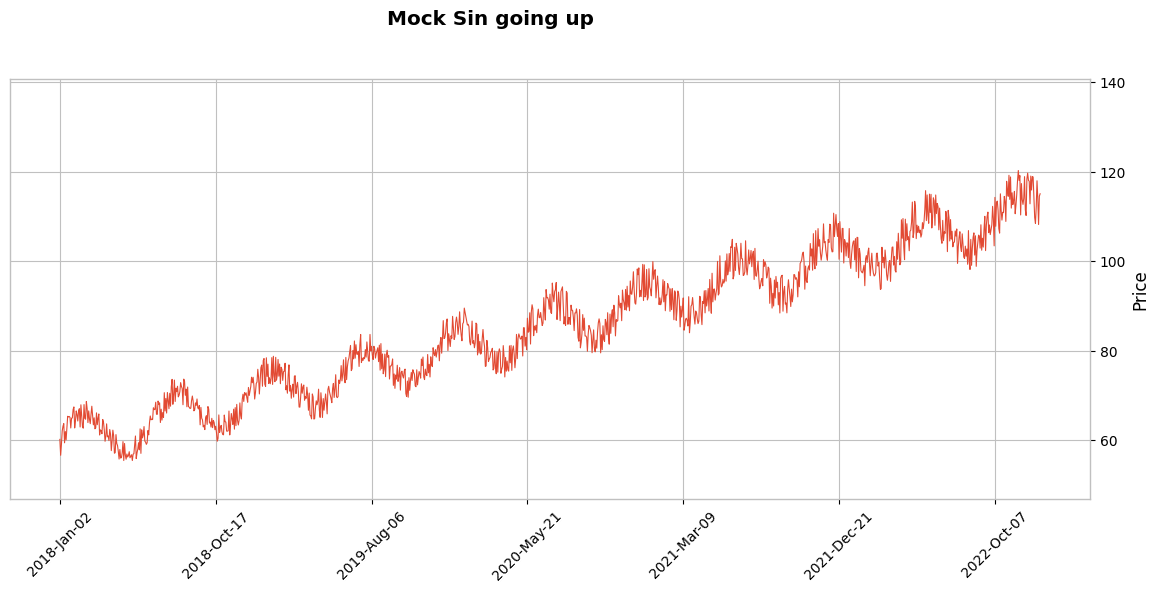

In [126]:
mpf.plot(df,
         type="line", 
         title = "Mock Sin going up",  
         figsize=fsize,
         style=plot_style, 
         returnfig=True,
         show_nontrading=False,
         warn_too_much_data=1500
    )

In [127]:
y2_linear = np.arange(50,100,50/len(date_index)) 
y2_sin = np.sin(np.array(range(len(date_index)))*np.pi/60) * 5 * (-1) + 6
y_noise = np.random.rand(len(date_index))
y2_train = y2_linear + y2_sin + y_noise

df2 = add_mock_details(y2_train, date_index)
write_to_csv(df, "sin_wave_going_up_complement")

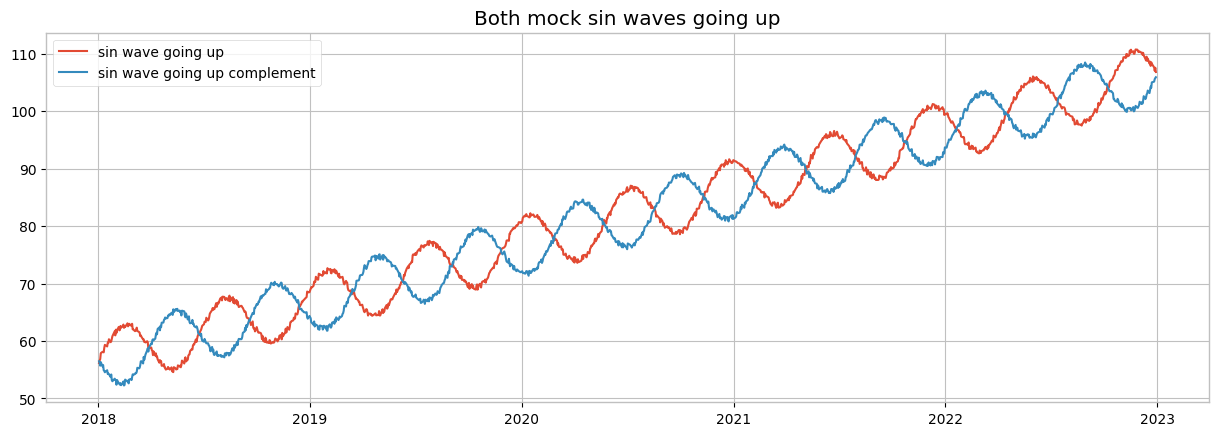

In [128]:
plt.figure().set_figwidth(15)

plt.plot(X_train, y_train, label='sin wave going up')
plt.plot(X_train, y2_train, label='sin wave going up complement')

plt.title('Both mock sin waves going up')
plt.legend()

plt.show()

## Sin Wave Going down

In [129]:
X_train = date_index
y_linear = np.flip(np.arange(20,100,80/len(date_index))) 
y_sin = np.sin(np.array(range(len(date_index)))*np.pi/60) * 5 + 6
y_noise = np.random.rand(len(date_index))
y_train = y_linear + y_sin + y_noise
df = add_mock_details(y_train, date_index)
write_to_csv(df, "sin_wave_going_down")


(<Figure size 1500x600 with 2 Axes>, [<Axes:ylabel='Price'>, <Axes:>])

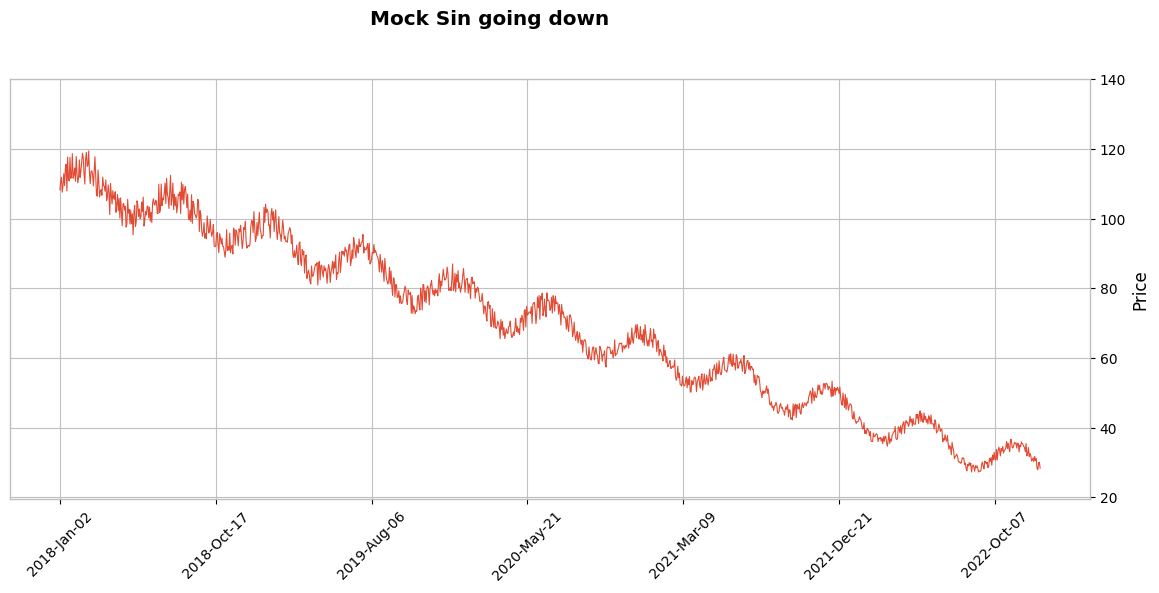

In [130]:
mpf.plot(df,
         type="line", 
         title = "Mock Sin going down",  
         figsize=fsize,
         style=plot_style, 
         returnfig=True,
         show_nontrading=False,
         warn_too_much_data=1500
    )

In [131]:
y2_linear = np.flip(np.arange(20,100,80/len(date_index))) 
y2_sin = np.sin(np.array(range(len(date_index)))*np.pi/60) * 5 * (-1) + 6
y_noise = np.random.rand(len(date_index))
y2_train = y2_linear + y2_sin + y_noise

df2 = add_mock_details(y2_train, date_index)
write_to_csv(df, "sin_wave_going_down_complement")

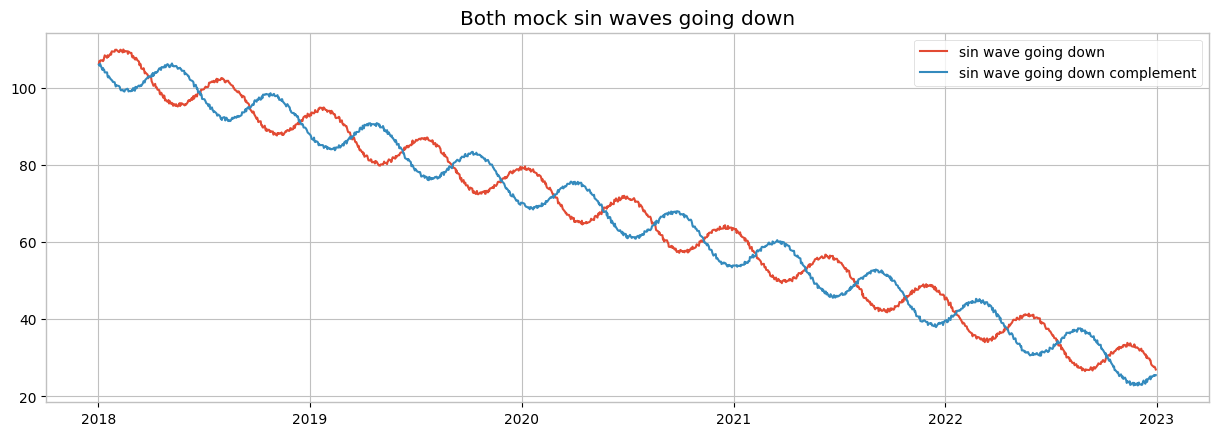

In [132]:
plt.figure().set_figwidth(15)

plt.plot(X_train, y_train, label='sin wave going down')
plt.plot(X_train, y2_train, label='sin wave going down complement')

plt.title('Both mock sin waves going down')
plt.legend()

plt.show()

## Sin Wave Going up then down

In [133]:
X_train = date_index
len_going_up = int(13*len(date_index)/16)
y_linear = np.concatenate([np.arange(50,100,50/len_going_up) , np.flip(np.arange(88,100,12/(len(date_index)-len_going_up)))] )
y_sin = np.sin(np.array(range(len(date_index)))*np.pi/60) * 5 + 6
y_noise = np.random.rand(len(date_index))
y_train = y_linear + y_sin + y_noise
df = add_mock_details(y_train, date_index)
write_to_csv(df, "sin_wave_going_up_then_down")

(<Figure size 1500x600 with 2 Axes>, [<Axes:ylabel='Price'>, <Axes:>])

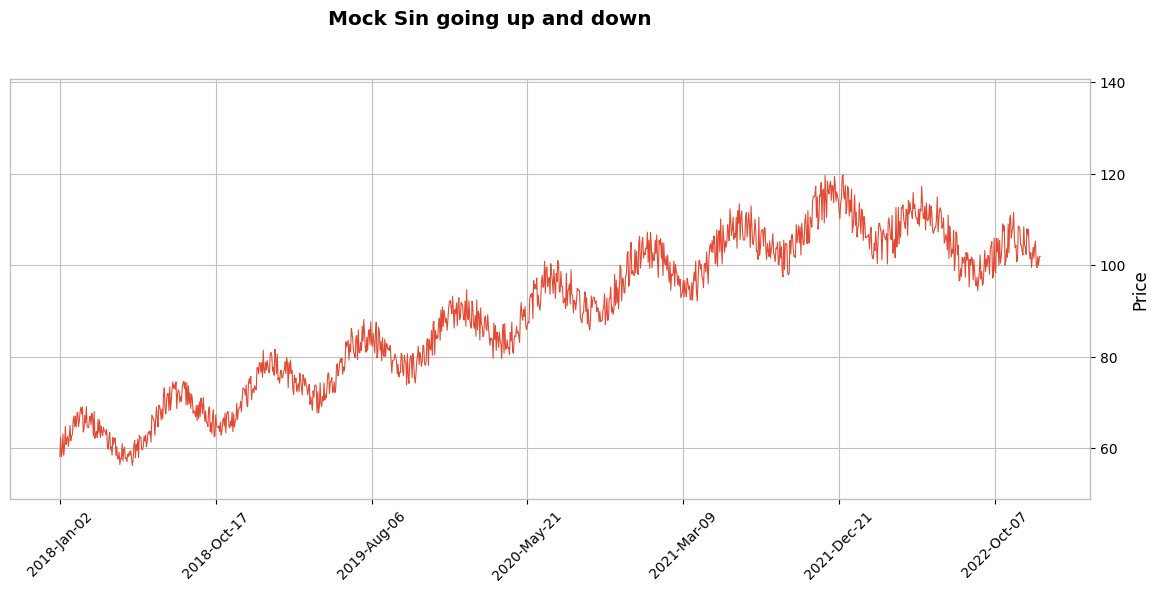

In [134]:
mpf.plot(df,
         type="line", 
         title = "Mock Sin going up and down",  
         figsize=fsize,
         style=plot_style, 
         returnfig=True,
         show_nontrading=False,
         warn_too_much_data=1500
    )

In [135]:
len_going_up = int(13*len(date_index)/16)
y2_linear = np.concatenate([np.arange(50,100,50/len_going_up) , np.flip(np.arange(88,100,12/(len(date_index)-len_going_up)))] )
y2_sin = np.sin(np.array(range(len(date_index)))*np.pi/60) * 5 * (-1) + 6
y_noise = np.random.rand(len(date_index))
y2_train = y2_linear + y2_sin + y_noise

df = add_mock_details(y_train, date_index)
write_to_csv(df, "sin_wave_going_up_then_down_complement")

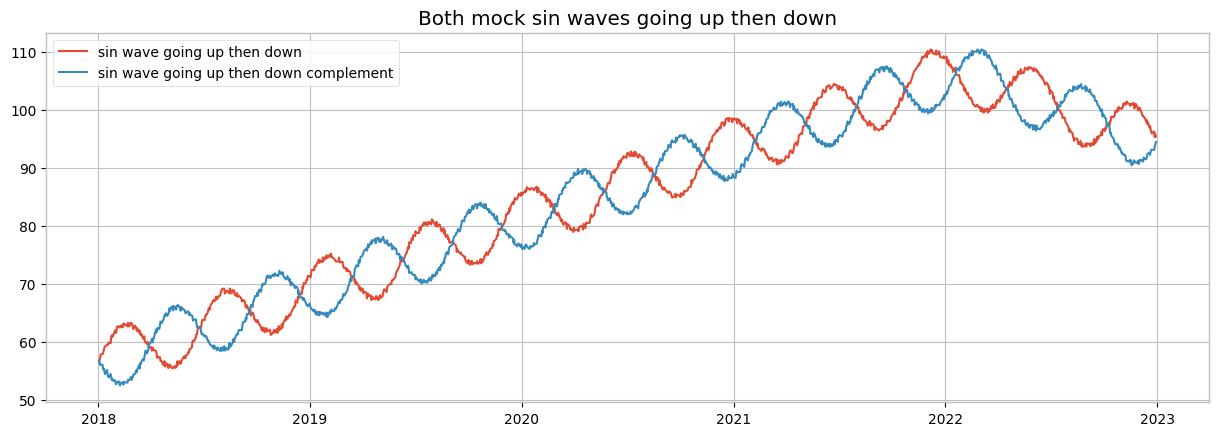

In [136]:
plt.figure().set_figwidth(15)

plt.plot(X_train, y_train, label='sin wave going up then down')
plt.plot(X_train, y2_train, label='sin wave going up then down complement')

plt.title('Both mock sin waves going up then down')
plt.legend()

plt.show()